# Clustering


Wikipedia: Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). Clustering is one of the main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, and bioinformatics.

Sources: http://scikit-learn.org/stable/modules/clustering.html

## K-means clustering

Source: C. M. Bishop *Pattern Recognition and Machine Learning*, Springer, 2006

Suppose we have a data set $X = \{x_1 , \cdots , x_N\}$ that consists of $N$ observations of a random $D$-dimensional Euclidean variable $x$. Our goal is to partition the data set into some number, $K$, of clusters, where we shall suppose for the moment that the value of $K$ is given. Intuitively, we might think of a cluster as comprising a group of data points whose inter-point distances are small compared to the distances to points outside of the cluster. We can formalize this notion by first introducing a set of $D$-dimensional vectors $\mu_k$, where $k = 1, \ldots, K$, in which $\mu_k$ is a **prototype** associated with the $k^{th}$ cluster. As we shall see shortly, we can think of the $\mu_k$ as representing the centres of the clusters. Our goal is then to find an assignment of data points to clusters, as well as a set of vectors $\{\mu_k\}$, such that the sum of the squares of the distances of each data point to its closest prototype vector $\mu_k$, is at a minimum.

It is convenient at this point to define some notation to describe the assignment of data points to clusters. For each data point $x_i$ , we introduce a corresponding set of binary indicator variables $r_{ik} \in \{0, 1\}$, where $k = 1, \ldots, K$, that describes which of the $K$ clusters the data point $x_i$ is assigned to, so that if data point $x_i$ is assigned to cluster $k$ then $r_{ik} = 1$, and $r_{ij} = 0$ for $j \neq k$. This is known as the 1-of-$K$ coding scheme. We can then define an objective function, denoted **inertia**, as

$$
J(r, \mu) = \sum_i^N \sum_k^K r_{ik} \|x_i - \mu_k\|_2^2
$$

which represents the sum of the squares of the Euclidean distances of each data point to its assigned vector $\mu_k$. Our goal is to find values for the $\{r_{ik}\}$ and the $\{\mu_k\}$ so as to minimize the function $J$. We can do this through an iterative procedure in which each iteration involves two successive steps corresponding to successive optimizations with respect to the $r_{ik}$ and the $\mu_k$ . First we choose some initial values for the $\mu_k$. Then in the first phase we minimize $J$ with respect to the $r_{ik}$, keeping the $\mu_k$ fixed. In the second phase we minimize $J$ with respect to the $\mu_k$, keeping $r_{ik}$ fixed. This two-stage optimization process is then repeated until convergence. We shall see that these two stages of updating $r_{ik}$ and $\mu_k$ correspond respectively to the expectation (E) and maximization (M) steps of the expectation-maximisation (EM) algorithm, and to emphasize this we shall use the terms E step and M step in the context of the $K$-means algorithm.

Consider first the determination of the $r_{ik}$ . Because $J$ in is a linear function of $r_{ik}$ , this optimization can be performed easily to give a closed form solution. The terms involving different $i$ are independent and so we can optimize for each $i$ separately by choosing $r_{ik}$ to be 1 for whichever value of $k$ gives the minimum value of $||x_i - \mu_k||^2$ . In other words, we simply assign the $i$th data point to the closest cluster centre. More formally, this can be expressed as

\begin{equation}
  r_{ik}=\begin{cases}
    1, & \text{if } k = \arg\min_j ||x_i - \mu_j||^2.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}

Now consider the optimization of the $\mu_k$ with the $r_{ik}$ held fixed. The objective function $J$ is a quadratic function of $\mu_k$, and it can be minimized by setting its derivative with respect to $\mu_k$ to zero giving

$$
2 \sum_i r_{ik}(x_i - \mu_k) = 0
$$

which we can easily solve for $\mu_k$ to give

$$
\mu_k = \frac{\sum_i r_{ik}x_i}{\sum_i r_{ik}}.
$$

The denominator in this expression is equal to the number of points assigned to cluster $k$, and so this result has a simple interpretation, namely set $\mu_k$ equal to the mean of all of the data points $x_i$ assigned to cluster $k$. For this reason, the procedure is known as the $K$-means algorithm.

The two phases of re-assigning data points to clusters and re-computing the cluster means are repeated in turn until there is no further change in the assignments (or until some maximum number of iterations is exceeded). Because each phase reduces the value of the objective function $J$, convergence of the algorithm is assured. However, it may converge to a local rather than global minimum of $J$.

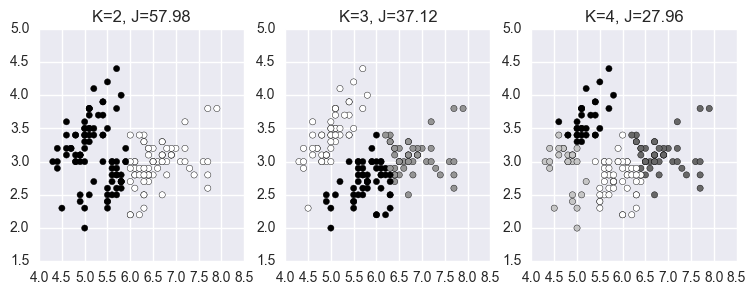

In [4]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns  # nice color
%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:, :2]  # use only 'sepal length and sepal width'
y_iris = iris.target

km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)

plt.figure(figsize=(9, 3)) 
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=km4.labels_)#.astype(np.float))
plt.title("K=4, J=%.2f" % km4.inertia_)

### Exercises

#### 1. Analyse clusters

- Analyse the plot above visually. What would a good value of $K$ be?

- If you instead consider the inertia, the value of $J$, what would a good value of $K$ be?

- Explain why there is such difference.

- For $K=2$ why did $K$-means clustering not find the two "natural" clusters? See the assumptions of $K$-means: 
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#example-cluster-plot-kmeans-assumptions-py

#### 2. Re-implement the $K$-means clustering algorithm (homework)

Write a function `kmeans(X, K)` that return an integer vector of the samples' labels.

## Hierarchical clustering

Hierarchical clustering is an approach to clustering that build hierarchies of clusters in two main approaches:

- **Agglomerative**: A *bottom-up* strategy, where each observation starts in their own cluster, and pairs of clusters are merged upwards in the hierarchy.

- **Divisive**: A *top-down* strategy, where all observations start out in the same cluster, and then the clusters are split recursively downwards in the hierarchy.

In order to decide which clusters to merge or to split, a measure of dissimilarity between clusters is introduced. More specific, this comprise a *distance* measure and a *linkage* criterion. The distance measure is just what it sounds like, and the linkage criterion is essentially a function of the distances between points, for instance the minimum distance between points in two clusters, the maximum distance between points in two clusters, the average distance between points in two clusters, etc. One particular linkage criterion, the Ward criterion, will be discussed next.

### Ward clustering

Ward clustering belongs to the family of agglomerative hierarchical clustering algorithms. This means that they are based on a "bottoms up" approach: each sample starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

In Ward clustering, the criterion for choosing the pair of clusters to merge at each step is the minimum variance criterion. Ward's minimum variance criterion minimizes the total within-cluster variance by each merge. To implement this method, at each step: find the pair of clusters that leads to minimum increase in total within-cluster variance after merging. This increase is a weighted squared distance between cluster centers.

The main advantage of agglomerative hierarchical clustering over $K$-means clustering is that you can benefit from known neighborhood information, for example, neighboring pixels in an image.

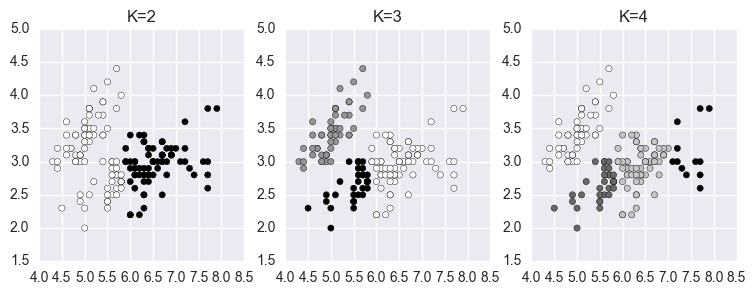

In [16]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns  # nice color

iris = datasets.load_iris()
X = iris.data[:, :2]  # 'sepal length (cm)''sepal width (cm)'
y_iris = iris.target

ward2 = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
ward3 = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
ward4 = cluster.AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)

plt.figure(figsize=(9, 3)) 
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=ward2.labels_)
plt.title("K=2")

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=ward3.labels_)
plt.title("K=3")

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=ward4.labels_)  # .astype(np.float))
plt.title("K=4")

## Gaussian mixture models

The Gaussian mixture model (GMM) is a simple linear superposition of Gaussian components over the data, aimed at providing a rich class of density models. We turn to a formulation of Gaussian mixtures in terms of discrete latent variables: the $K$ hidden classes to be discovered.

Differences compared to $K$-means:

- Whereas the $K$-means algorithm performs a hard assignment of data points to clusters, in which each data point is associated uniquely with one cluster, the GMM algorithm makes a soft assignment based on posterior probabilities.

- Whereas the classic $K$-means is only based on Euclidean distances, classic GMM use a Mahalanobis distances that can deal with non-spherical distributions. It should be noted that Mahalanobis could be plugged within an improved version of $K$-Means clustering. The Mahalanobis distance is unitless and scale-invariant, and takes into account the correlations of the data set.

The Gaussian mixture distribution can be written as a linear superposition of $K$ Gaussians in the form:

$$
p(x) = \sum_{k=1}^K \mathcal{N}(x \,|\, \mu_k, \Sigma_k)p(k),
$$

where:

- The $p(k)$ are the mixing coefficients also know as the class probability of class $k$, and they sum to one: $\sum_{k=1}^K p(k) = 1$.

- $\mathcal{N}(x \,|\, \mu_k, \Sigma_k) = p(x \,|\, k)$ is the conditional distribution of $x$ given a particular class $k$. It is the multivariate Gaussian distribution defined over a $P$-dimensional vector $x$ of continuous variables.

The goal is to maximize the log-likelihood of the GMM:

$$
\ln \prod_{i=1}^N p(x_i)= \ln \prod_{i=1}^N \left\{ \sum_{k=1}^K \mathcal{N}(x_i \,|\, \mu_k, \Sigma_k)p(k) \right\} = \sum_{i=1}^N \ln\left\{ \sum_{k=1}^K  \mathcal{N}(x_i \,|\, \mu_k, \Sigma_k) p(k) \right\}.
$$

To compute the classes parameters: $p(k), \mu_k, \Sigma_k$ we sum over all samples, by weighting each sample $i$ by its responsibility or contribution to class $k$: $p(k \,|\, x_i)$ such that for each point its contribution to all classes sum to one $\sum_k p(k \,|\, x_i) = 1$. This contribution is the conditional probability
of class $k$ given $x$: $p(k \,|\, x)$ (sometimes called the posterior). It can be computed using Bayes' rule:

\begin{align}
p(k \,|\, x) &= \frac{p(x \,|\, k)p(k)}{p(x)}\\
                 &= \frac{\mathcal{N}(x \,|\, \mu_k, \Sigma_k)p(k)}{\sum_{k=1}^K \mathcal{N}(x \,|\, \mu_k, \Sigma_k)p(k)}
\end{align}

Since the class parameters, $p(k)$, $\mu_k$ and $\Sigma_k$, depend on the responsibilities $p(k \,|\, x)$ and the responsibilities depend on class parameters, we need a two-step iterative algorithm: the expectation-maximization (EM) algorithm. We discuss this algorithm next.

### The expectation-maximization (EM) algorithm for Gaussian mixtures

Given a Gaussian mixture model, the goal is to maximize the likelihood function with respect to the parameters (comprised of the means and covariances of the components and the mixing coefficients).

Initialize the means $\mu_k$, covariances $\Sigma_k$ and mixing coefficients $p(k)$

1. **E step**. For each sample $i$, evaluate the responsibilities for each class $k$ using the current parameter values

$$
p(k \,|\, x_i) = \frac{\mathcal{N}(x_i \,|\, \mu_k, \Sigma_k)p(k)}{\sum_{k=1}^K \mathcal{N}(x_i \,|\, \mu_k, \Sigma_k)p(k)}
$$

2. **M step**. For each class, re-estimate the parameters using the current responsibilities

\begin{align}
\mu_k^{\text{new}}    &= \frac{1}{N_k} \sum_{i=1}^N p(k \,|\, x_i) x_i\\
\Sigma_k^{\text{new}} &= \frac{1}{N_k} \sum_{i=1}^N p(k \,|\, x_i) (x_i - \mu_k^{\text{new}}) (x_i - \mu_k^{\text{new}})^T\\
p^{\text{new}}(k)     &= \frac{N_k}{N}
\end{align}

3. Evaluate the log-likelihood

$$
    \sum_{i=1}^N \ln \left\{ \sum_{k=1}^K \mathcal{N}(x|\mu_k, \Sigma_k) p(k) \right\},
$$

and check for convergence of either the parameters or the log-likelihood. If the convergence criterion is not satisfied return to step 1.

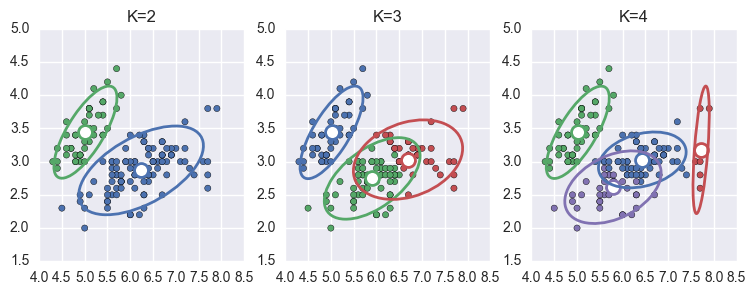

In [5]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns  # nice color
import sklearn
from sklearn.mixture import GaussianMixture

import pystatsml.plot_utils

colors = sns.color_palette()

iris = datasets.load_iris()
X = iris.data[:, :2]  # 'sepal length (cm)''sepal width (cm)'
y_iris = iris.target

gmm2 = GaussianMixture(n_components=2, covariance_type='full').fit(X)
gmm3 = GaussianMixture(n_components=3, covariance_type='full').fit(X)
gmm4 = GaussianMixture(n_components=4, covariance_type='full').fit(X)

plt.figure(figsize=(9, 3)) 
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm2.predict(X)])#, color=colors)
for i in range(gmm2.covariances_.shape[0]):
    pystatsml.plot_utils.plot_cov_ellipse(cov=gmm2.covariances_[i, :], pos=gmm2.means_[i, :],
                     facecolor='none', linewidth=2, edgecolor=colors[i])
    plt.scatter(gmm2.means_[i, 0], gmm2.means_[i, 1], edgecolor=colors[i],
                marker="o", s=100, facecolor="w", linewidth=2)
plt.title("K=2")

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm3.predict(X)])
for i in range(gmm3.covariances_.shape[0]):
    pystatsml.plot_utils.plot_cov_ellipse(cov=gmm3.covariances_[i, :], pos=gmm3.means_[i, :],
                     facecolor='none', linewidth=2, edgecolor=colors[i])
    plt.scatter(gmm3.means_[i, 0], gmm3.means_[i, 1], edgecolor=colors[i],
                marker="o", s=100, facecolor="w", linewidth=2)
plt.title("K=3")

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm4.predict(X)])  # .astype(np.float))
for i in range(gmm4.covariances_.shape[0]):
    pystatsml.plot_utils.plot_cov_ellipse(cov=gmm4.covariances_[i, :], pos=gmm4.means_[i, :],
                     facecolor='none', linewidth=2, edgecolor=colors[i])
    plt.scatter(gmm4.means_[i, 0], gmm4.means_[i, 1], edgecolor=colors[i],
                marker="o", s=100, facecolor="w", linewidth=2)
_ = plt.title("K=4")

## Model selection


### Bayesian information criterion

In statistics, the Bayesian information criterion (BIC) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

Choose k= 2


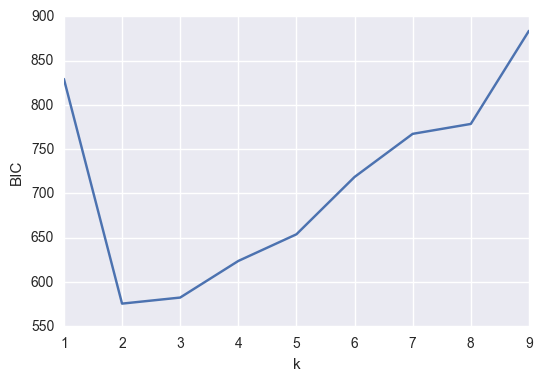

In [26]:
X = iris.data
y_iris = iris.target

bic = list()
#print(X)

ks = np.arange(1, 10)

for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(X)
    bic.append(gmm.bic(X))

k_chosen = ks[np.argmin(bic)]

plt.plot(ks, bic)
plt.xlabel("k")
plt.ylabel("BIC")

print("Choose k=", k_chosen)